In [459]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import copy
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from sklearn.utils import resample
from wordcloud import WordCloud
import re
re.compile('<title>(.*)</title>')

[nltk_data] Downloading package stopwords to /home/dhawal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dhawal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/dhawal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


re.compile(r'<title>(.*)</title>', re.UNICODE)

In [460]:
df = pd.read_csv("review.csv",names = ["id", "stars", "text","oneword","user","user_taste","api"])

In [461]:
df
df=df.drop(["api","user_taste","user","id"],axis=1)
# df

In [462]:
# df=df.drop(['Unnamed: 10','Unnamed: 11','review_id','date'],axis=1)

# df=df.drop(['user_id','business_id','type'],axis=1)

## UPSAMPLE

In [463]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
stemmer

### Coversion in lower case ###

In [464]:
df['text'] = df['text'].str.lower()

### Removal of stop words

In [465]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

stop=stop[0:144]
stop.append('back')
stop.append('n\'t')
stop.append('dice')

In [466]:
df['text']
df['text'] = df['text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

In [467]:
# df

In [468]:
 df.select_dtypes(include=['float64'])

,stars
0,1.0
1,1.0
2,4.0
3,1.0
4,3.0
5,4.0
6,5.0
7,4.0
8,4.0
9,4.0


In [469]:
df.dtypes

stars      float64
text        object
oneword     object
dtype: object

### Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.

In [470]:
# df['text'].dropna
# df.dropna(how='all')

In [471]:
# df['text']=df['text'].notnull()
# df.isnull().values.any()
# nan_rows = df[df['text'].isnull()]
# nan_rows
# df=df[bdf['text'].notnull()]


In [472]:
df=df.dropna()

In [473]:
df

,stars,text,oneword
0,1.0,we had ordered two chicken dishes via swiggy. ...,Avoid!
1,1.0,"very poor service, i had ordered paneer butter...",Avoid!
2,4.0,food is good and ambience of the place is good...,Great!
3,1.0,not at all satisfied with the quality of food....,Avoid!
4,3.0,many times i hv ordered from amigos and have a...,Average
5,4.0,first thing you notice is the ambience 5/5 fo...,Great!
6,5.0,one of the best dessert place to go. the choco...,Insane!
7,4.0,you had your dinner and want to chill out and ...,Great!
8,4.0,its a cosy place for grabbing some light snack...,Great!
9,4.0,good choice of desserts and specially the choc...,Great!


In [474]:
nan_rows = df[df['stars'].isnull()]

In [475]:
# df=df.drop(df.index[nan_rows])

In [476]:
nan_rows

,stars,text,oneword


In [477]:
df['text'] = df['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))

#### INCLUSION OF LENGTH OF REVIEW

In [478]:
df['length'] = df['text'].apply(len)

### Review vs Stars

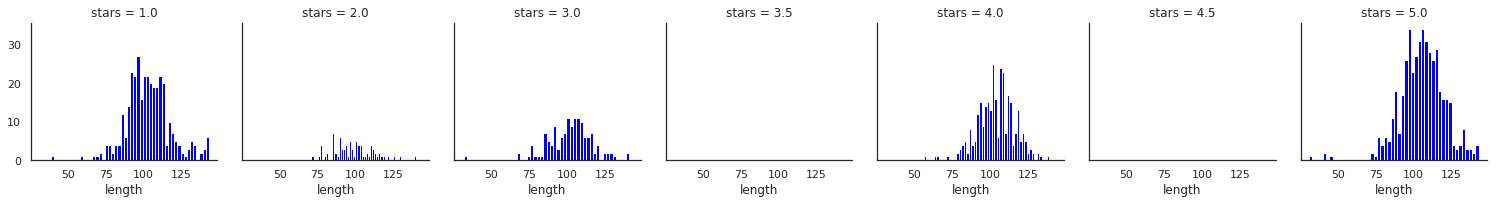

In [479]:
graph = sns.FacetGrid(data=df,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

#### Removal of meaningless thing from text

In [480]:
def fun(x):
#     print(x)
    blob=TextBlob(x)
#     print("blob ",blob)
    verb=[]
    s=" "
    for word, tag in blob.tags:
#         print("ffff")
        if tag == 'RB' or tag=='RBR' or tag=='RBS' or tag=='JJ' or tag=='JJR':
            verb.append(word)
    s=s.join(verb)
    return s

In [481]:
def plot_word_cloud(data):
    '''
    Function to plot word cloud from a pandas series
    Input: data: pandas.core.series.Series object
    Output: Wordcloud of most recurrent words in data
        for plots to be in ipython notebook include following line before calling this function
        %matplotlib inline 
    '''
    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(str(data))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [482]:
df

,stars,text,oneword,length
0,1.0,ordered two chicken dishes via swiggy. despite...,Avoid!,114
1,1.0,"poor service, ordered paneer butter masala got...",Avoid!,110
2,4.0,food good ambience place good family nice plac...,Great!,99
3,1.0,satisfied quality food.ordered shanghai rice d...,Avoid!,91
4,3.0,many times hv ordered amigos always appreciate...,Average,117
5,4.0,"first thing notice ambience 5/5 ambience, tast...",Great!,111
6,5.0,one best dessert place go. chocolate room anot...,Insane!,111
7,4.0,dinner want chill enjoy delicious deserts/coff...,Great!,100
8,4.0,cosy place grabbing light snacks drinks/shakes...,Great!,100
9,4.0,good choice desserts specially chocolate bomb ...,Great!,105


In [483]:
df=df.reset_index()
df

,index,stars,text,oneword,length
0,0,1.0,ordered two chicken dishes via swiggy. despite...,Avoid!,114
1,1,1.0,"poor service, ordered paneer butter masala got...",Avoid!,110
2,2,4.0,food good ambience place good family nice plac...,Great!,99
3,3,1.0,satisfied quality food.ordered shanghai rice d...,Avoid!,91
4,4,3.0,many times hv ordered amigos always appreciate...,Average,117
5,5,4.0,"first thing notice ambience 5/5 ambience, tast...",Great!,111
6,6,5.0,one best dessert place go. chocolate room anot...,Insane!,111
7,7,4.0,dinner want chill enjoy delicious deserts/coff...,Great!,100
8,8,4.0,cosy place grabbing light snacks drinks/shakes...,Great!,100
9,9,4.0,good choice desserts specially chocolate bomb ...,Great!,105


In [484]:
df=df.drop(['index'],axis=1)

In [485]:
df

,stars,text,oneword,length
0,1.0,ordered two chicken dishes via swiggy. despite...,Avoid!,114
1,1.0,"poor service, ordered paneer butter masala got...",Avoid!,110
2,4.0,food good ambience place good family nice plac...,Great!,99
3,1.0,satisfied quality food.ordered shanghai rice d...,Avoid!,91
4,3.0,many times hv ordered amigos always appreciate...,Average,117
5,4.0,"first thing notice ambience 5/5 ambience, tast...",Great!,111
6,5.0,one best dessert place go. chocolate room anot...,Insane!,111
7,4.0,dinner want chill enjoy delicious deserts/coff...,Great!,100
8,4.0,cosy place grabbing light snacks drinks/shakes...,Great!,100
9,4.0,good choice desserts specially chocolate bomb ...,Great!,105


In [486]:
df['text'] = df['text'].apply(fun)

# strv=df.groupby('stars').mean()
# stval.corr()
# strv.mean('cool')
# strv

# strv.corr()

### STEMMING

In [487]:
df['text'] = df['text'].apply(lambda x:' '.join([stemmer.stem(word) for word in x.split() if word in stemmer.stem(word)]))

In [488]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [489]:
texts = df['text']
stars = df['stars']

In [490]:
print(len(texts))

1335


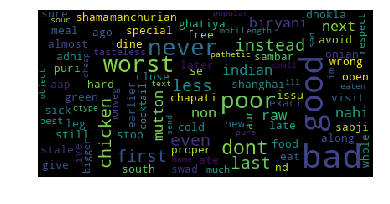

In [491]:
plot_word_cloud(df["text"].loc[df.stars == 1,])

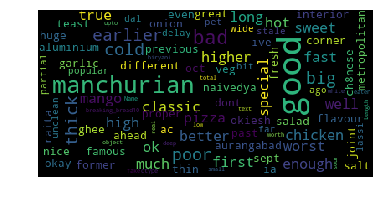

In [492]:
plot_word_cloud(df["text"].loc[df.stars == 2,])

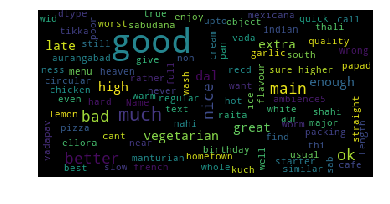

In [493]:
plot_word_cloud(df["text"].loc[df.stars == 3,])

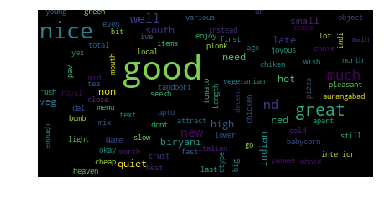

In [494]:
plot_word_cloud(df["text"].loc[df.stars == 4,])

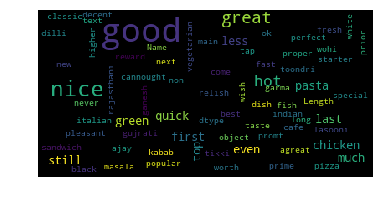

In [495]:
plot_word_cloud(df["text"].loc[df.stars == 5,])

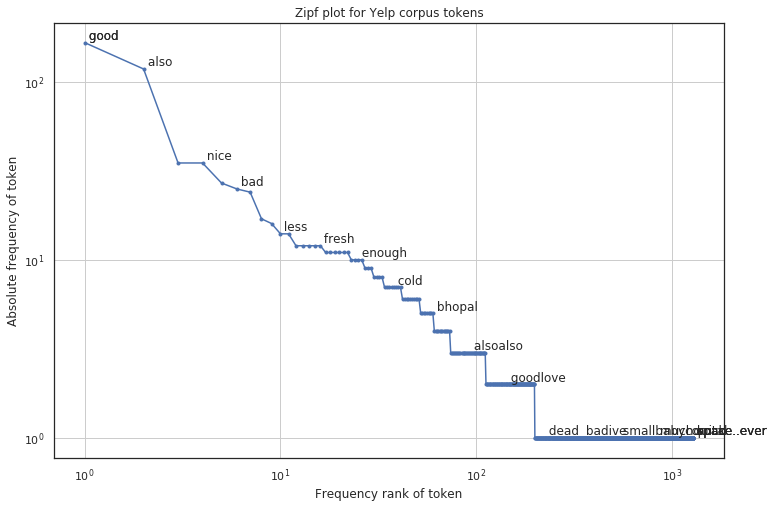

In [496]:
yelp_review_tokens = df.text.sum()
yelp_review_vocabulary = nltk.FreqDist(yelp_review_tokens.split())
yelp_review_vocabulary_counts = np.array(list(yelp_review_vocabulary.values()))
yelp_review_vocabulary_tokens = list(yelp_review_vocabulary.keys())

# A Zipf plot
ranks = np.arange(1, len(yelp_review_vocabulary_counts)+1)
indices = np.argsort(-yelp_review_vocabulary_counts)
frequencies = yelp_review_vocabulary_counts[indices]
fig3 = plt.figure(figsize=(12, 8))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf plot for Yelp corpus tokens")
plt.xlabel("Frequency rank of token")
plt.ylabel("Absolute frequency of token")
plt.grid(True)
for n in list(np.logspace(-0.5, np.log10(len(yelp_review_vocabulary_counts)), 20).astype(int)):
    dummy = plt.text(ranks[n-1], frequencies[n-1], " " + yelp_review_vocabulary_tokens[indices[n-1]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [497]:
dict1={}
dict1[1]=[]
dict1[2]=[]
dict1[3]=[]
dict1[4]=[]
dict1[5]=[]

In [498]:
nan_rows = df[df['stars'].isnull()]
nan_rows

,stars,text,oneword,length


In [499]:
df

,stars,text,oneword,length
0,1.0,chicken special almost,Avoid!,114
1,1.0,poor non,Avoid!,110
2,4.0,good good nice good various also good,Great!,99
3,1.0,shanghai,Avoid!,91
4,3.0,,Average,117
5,4.0,first,Great!,111
6,5.0,great,Insane!,111
7,4.0,,Great!,100
8,4.0,light great,Great!,100
9,4.0,good bomb,Great!,105


In [500]:
# df['stars']
nan_rows = df[df['stars'].isnull()]
nan_rows

,stars,text,oneword,length


In [501]:
df['stars']

0       1.0
1       1.0
2       4.0
3       1.0
4       3.0
5       4.0
6       5.0
7       4.0
8       4.0
9       4.0
10      5.0
11      5.0
12      4.0
13      5.0
14      4.5
15      5.0
16      5.0
17      5.0
18      2.0
19      5.0
20      1.0
21      1.0
22      4.0
23      1.0
24      1.0
25      1.0
26      1.0
27      5.0
28      4.0
29      5.0
       ... 
1305    4.0
1306    1.0
1307    4.0
1308    5.0
1309    5.0
1310    5.0
1311    5.0
1312    5.0
1313    5.0
1314    3.0
1315    4.0
1316    4.0
1317    1.0
1318    4.0
1319    1.0
1320    4.0
1321    4.0
1322    5.0
1323    1.0
1324    3.0
1325    5.0
1326    5.0
1327    1.0
1328    4.0
1329    1.0
1330    1.0
1331    5.0
1332    4.0
1333    4.0
1334    2.0
Name: stars, Length: 1335, dtype: float64

In [502]:
positive=0
negative=0
count=0
#polarity and star graph 

for i in df['text']:
    blob = TextBlob(i)
    feel = blob.sentiment
    if feel.polarity > 0:
        positive = positive + 1
    else:
        negative = negative + 1
    if(feel.polarity<0.10):
        df.loc[count, 'sentiment'] = int(1)
    elif(feel.polarity>=0.10 and feel.polarity < 0.16):
        df.loc[count, 'sentiment'] = int(2)
    elif(feel.polarity>=0.16 and feel.polarity < 0.025):
        df.loc[count, 'sentiment'] = int(3)
    elif(feel.polarity>=0.025 and feel.polarity < 0.35):
        df.loc[count, 'sentiment'] = int(4)
    else:
        df.loc[count, 'sentiment'] = int(5)
    w=df.loc[count, 'stars']
#     print(w)
    if w=='NaN':
        print(i)
    print(w,count)
    dict1[int(w)].append(feel.polarity)
    count=count+1

1.0 0
1.0 1
4.0 2
1.0 3
3.0 4
4.0 5
5.0 6
4.0 7
4.0 8
4.0 9
5.0 10
5.0 11
4.0 12
5.0 13
4.5 14
5.0 15
5.0 16
5.0 17
2.0 18
5.0 19
1.0 20
1.0 21
4.0 22
1.0 23
1.0 24
1.0 25
1.0 26
5.0 27
4.0 28
5.0 29
5.0 30
4.0 31
1.0 32
1.0 33
4.0 34
5.0 35
1.0 36
4.0 37
5.0 38
1.0 39
2.0 40
1.0 41
1.0 42
4.0 43
5.0 44
1.0 45
1.0 46
1.0 47
1.0 48
1.0 49
4.0 50
2.0 51
1.0 52
1.0 53
1.0 54
1.0 55
4.0 56
4.0 57
2.0 58
4.0 59
1.0 60
5.0 61
5.0 62
5.0 63
5.0 64
4.0 65
5.0 66
4.0 67
5.0 68
4.5 69
4.0 70
5.0 71
4.0 72
1.0 73
4.0 74
1.0 75
4.0 76
5.0 77
5.0 78
1.0 79
4.0 80
1.0 81
3.0 82
1.0 83
1.0 84
4.0 85
5.0 86
1.0 87
5.0 88
5.0 89
3.0 90
3.0 91
1.0 92
4.0 93
1.0 94
5.0 95
5.0 96
1.0 97
5.0 98
4.0 99
4.0 100
1.0 101
4.0 102
5.0 103
1.0 104
5.0 105
1.0 106
1.0 107
4.0 108
3.0 109
5.0 110
1.0 111
5.0 112
5.0 113
5.0 114
3.0 115
1.0 116
1.0 117
2.0 118
5.0 119
5.0 120
5.0 121
1.0 122
5.0 123
5.0 124
4.0 125
1.0 126
1.0 127
5.0 128
1.0 129
5.0 130
5.0 131
5.0 132
5.0 133
5.0 134
5.0 135
5.0 136
3.0 137
4.0 13

5.0 1125
2.0 1126
1.0 1127
5.0 1128
1.0 1129
1.0 1130
4.0 1131
1.0 1132
3.0 1133
5.0 1134
5.0 1135
1.0 1136
1.0 1137
4.0 1138
1.0 1139
5.0 1140
4.0 1141
4.0 1142
5.0 1143
5.0 1144
1.0 1145
4.0 1146
3.0 1147
1.0 1148
2.0 1149
5.0 1150
5.0 1151
4.0 1152
5.0 1153
3.0 1154
4.0 1155
5.0 1156
3.0 1157
5.0 1158
5.0 1159
5.0 1160
1.0 1161
3.0 1162
4.0 1163
3.0 1164
1.0 1165
1.0 1166
4.0 1167
4.0 1168
2.0 1169
1.0 1170
5.0 1171
1.0 1172
2.0 1173
1.0 1174
5.0 1175
1.0 1176
1.0 1177
4.0 1178
1.0 1179
5.0 1180
1.0 1181
5.0 1182
4.0 1183
4.0 1184
5.0 1185
4.0 1186
5.0 1187
5.0 1188
4.0 1189
5.0 1190
5.0 1191
1.0 1192
4.0 1193
1.0 1194
1.0 1195
1.0 1196
5.0 1197
1.0 1198
1.0 1199
2.0 1200
5.0 1201
3.0 1202
5.0 1203
5.0 1204
3.0 1205
5.0 1206
4.0 1207
5.0 1208
5.0 1209
1.0 1210
5.0 1211
4.0 1212
4.0 1213
1.0 1214
1.0 1215
5.0 1216
4.0 1217
3.0 1218
4.0 1219
5.0 1220
5.0 1221
1.0 1222
2.0 1223
4.0 1224
1.0 1225
3.0 1226
4.0 1227
1.0 1228
5.0 1229
5.0 1230
5.0 1231
4.0 1232
5.0 1233
3.0 1234
3.0 1235
5

In [503]:
nan_rows = df[df['stars'].isnull()]
nan_rows

,stars,text,oneword,length,sentiment


In [504]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = list(dict1.values())
y

[[-0.12142857142857141,
  -0.4,
  0.0,
  -0.23076923076923078,
  0.13636363636363635,
  0.0,
  0.35,
  0.0,
  -0.2,
  -0.23076923076923078,
  -0.5799999999999998,
  -0.14583333333333334,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.7,
  0.0,
  0.0,
  -0.19999999999999996,
  0.7,
  0.0,
  0.7,
  0.0,
  -0.6999999999999998,
  0.0,
  0.0,
  -0.46666666666666656,
  0.7,
  0.0,
  0.35,
  0.0,
  -1.0,
  0.35714285714285715,
  0.0,
  0.0,
  -0.14999999999999994,
  -0.05,
  0.0,
  -0.07500000000000001,
  0.7,
  -0.6999999999999998,
  0.475,
  0.7,
  -0.6999999999999998,
  0.0,
  0.0,
  -0.3499999999999999,
  0.0,
  0.0,
  0.0,
  0.5,
  -0.16666666666666666,
  0.0,
  -0.8,
  5.551115123125783e-17,
  0.13636363636363635,
  0.21428571428571427,
  -0.6999999999999998,
  0.0,
  -0.17499999999999996,
  -0.6999999999999998,
  5.551115123125783e-17,
  0.0,
  -0.31999999999999995,
  0.0,
  0.26666666666666666,
  0.125,
  -0.6999999999999998,
  0.0,
  0.0,
  -0.25,
  0.26666666666666666,
  0.0,
  -0.6,
  -0.3

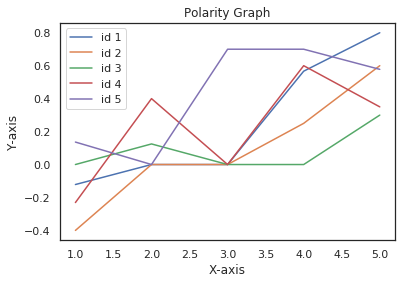

In [505]:
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Polarity Graph")
for i in range(len(y)):
    plt.plot(x,[pt[i] for pt in y],label = 'id %s'%(i+1))
plt.legend()
plt.show()

#### REASON FOR BALANCING CAN BE SEEN BY GRAPH SHOWING VARIATION IN COLLECTION OF RATING COUNT ###$

In [506]:
# stars_1 = df[df['stars']==1]
# stars_2 = df[df['stars']==2]
# stars_3 = df[df['stars']==3]
# stars_5 = df[df['stars']==5]
# stars_4 = df[df['stars']==4]

# df_minority_upsampled_1 = resample(stars_1, 
#                                  replace=True, 
#                                  n_samples=3526,
#                                  random_state=123)
# df_minority_upsampled_2 = resample(stars_2, 
#                                  replace=True, 
#                                  n_samples=3526,
#                                  random_state=123)
# df_minority_upsampled_3 = resample(stars_3, 
#                                  replace=True, 
#                                  n_samples=3526,
#                                  random_state=123)
# df_minority_upsampled_5 = resample(stars_5, 
#                                  replace=True, 
#                                  n_samples=3526,
#                                  random_state=123)
# df_upsampled = pd.concat([stars_4, df_minority_upsampled_1,df_minority_upsampled_2,df_minority_upsampled_3,df_minority_upsampled_5])

we’ll get less biased predictions if we train the system on balanced data. This means that ideally we should have the same number of examples of each review type.

In [507]:
# N_star_categories = 5
# colors = np.array(['#660000', '#ff4d4d', '#ffb3b3', '#99e699', '#29a329'])
# stars_labels = np.array(range(N_star_categories)) + 1;
# #star_category_dist_fig = plt.figure(figsize=(12,8))
# bar_plot_indices = np.arange(N_star_categories) 
# star_category_absolute_frequencies = df_upsampled.stars.value_counts(ascending=True);
# star_category_relative_frequencies = np.array(star_category_absolute_frequencies)/float(sum(star_category_absolute_frequencies))
# sns.set()
# sns.set(style="white")
# fig2 = plt.figure(figsize=(12, 8))
# ax = sns.barplot(x=bar_plot_indices + 1, y=star_category_relative_frequencies)
# ax.set_xlabel('Star Category');
# ax.set_ylabel('Relative Frequency');
# ax.set_title('Star Category Distribution for {0} Reviews'.format(len(df_upsampled)));

In [508]:
stars = df_upsampled['stars']
print(Counter(stars))
balanced_y = stars
balanced_x = df_upsampled['text']

Counter({1.0: 3526, 2.0: 3526, 3.0: 3526, 5.0: 3526, 4.0: 300})


In [509]:
# df_upsampled
# df_upsampled.reset_index()

### Data bais

In [510]:
# bow_transformer = CountVectorizer(analyzer=text_process).fit(X_train)
# df_upsampled = df_upsampled.loc[:,~df_upsampled.columns.duplicated()]

In [511]:
# df_upsampled
# df_upsampled.reset_index()

In [512]:
df2=df_upsampled[['sentiment','text','stars','oneword']]


In [513]:
df2

,sentiment,text,stars,oneword
2,5.0,good good nice good various also good,4.0,Great!
5,4.0,first,4.0,Great!
7,1.0,,4.0,Great!
8,5.0,light great,4.0,Great!
9,5.0,good bomb,4.0,Great!
12,5.0,great aurangabad vegetarian much,4.0,Great!
22,5.0,good,4.0,Great!
28,4.0,worth,4.0,Great!
31,1.0,close paneer,4.0,Great!
34,5.0,good,4.0,Great!


In [514]:
# df2.groupby('stars', as_index=False)['sentiment'].mean()

In [515]:
positive

775

In [516]:
negative

560

### TF-IDF ###
### This vectorizer breaks text into single words and bi-grams and then calculates the TF-IDF representation

In [517]:
# vectorizer = TfidfVectorizer(ngram_range=(1,2))
# vectors = vectorizer.fit_transform(balanced_x)
balanced_x.shape

(14404,)

In [518]:
# print(vectors)
# print(vectors.shape[0])
# print(vectors.shape[1])

X_train, X_test, y_train, y_test = train_test_split(df2, balanced_y, test_size=0.20, random_state=42)

In [519]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import FunctionTransformer
# build the pipeline
# ppl = Pipeline([
#               ('ngram',TfidfVectorizer(ngram_range=(1,2))),
#               ('clf',   LinearSVC())
              
#       ])

# # train the classifier
# model = ppl.fit(balanced_x,stars)

# # test the classifier
# y_test = model.predict(balanced_x)
# class sentiments(BaseEstimator, TransformerMixin):
#     """Takes in dataframe, extracts road name column, outputs average word length"""

#     def __init__(self):
#         pass

#     def average_word_length(self, name):
#         return df2['sentiment']
#         """Helper code to compute average word length of a name"""
# #         return np.mean([len(word) for word in name.split()])

#     def transform(self, df, y=None):
#         """The workhorse of this feature extractor"""
#         return df2['sentiment']

#     def fit(self, df, y=None):
#         """Returns `self` unless something different happens in train and test"""
#         return self

# # pipeline = Pipeline([
# #     ('feats', FeatureUnion([
# #         ('ave', sentiments())
# # #         ('ngram', TfidfVectorizer(ngram_range=(1,2))) # can pass in either a pipeline
# #         # or a transformer
# #     ])),
# #     ('clf', MultinomialNB())  # classifier
# # ])

# class tokenizer1(BaseEstimator, TransformerMixin):
#     """Takes in dataframe, extracts road name column, outputs average word length"""

#     def __init__(self):
#         pass

#     def average_word_length(self, name):
# #         return df2['sentiment']
#         """Helper code to compute average word length of a name"""
# #         return np.mean([len(word) for word in name.split()])

#     def transform(self, df, y=None):
#         """The workhorse of this feature extractor"""
#         return df2['sentiment']

#     def fit(self, df, y=None):
#         """Returns `self` unless something different happens in train and test"""
#         return self
    
# get_text_data = X_train['text']
# # get_numeric_data =pd.getX_train['sentiment']
# get_numeric_data=pd.get_dummies(X_train['sentiment'])


# process_and_join_features = Pipeline([
#     ('features', FeatureUnion([
#             ('numeric_features', Pipeline([
#                 ('selector', get_numeric_data)
#             ])),
#              ('text_features', Pipeline([
#                 ('selector', get_text_data),
#                 ('vec', CountVectorizer())
#             ]))
#          ])),
#     ('clf',MultinomialNB())
# ])

# model = process_and_join_features.fit(X_train,stars)
# y_test1 = model.predict(X_train)
from sklearn.preprocessing import FunctionTransformer

# Obtain the text data: get_text_data
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)
get_text1_data=FunctionTransformer(lambda x: x['oneword'], validate=False)
# Obtain the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[['sentiment']], validate=False)

# Fit and transform the text data: just_text_data
just_text_data = get_text_data.fit_transform(X_train)

# Fit and transform the numeric data: just_numeric_data
just_numeric_data = get_numeric_data.fit_transform(X_train)

# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

Text Data
882      zomato much uthapam
888         cant enough rare
631                also good
1147                 ok good
340     good also nice wrong
Name: text, dtype: object

Numeric Data
      sentiment
882         4.0
888         2.0
631         5.0
1147        5.0
340         4.0


In [520]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn import LogisticRegression
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
#                     ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ])),
                ('text1_features', Pipeline([
                    ('selector', get_text1_data),
                    ('vectorizer', CountVectorizer())
#                     ('imputer', Imputer())
                ]))
             ]
        )

# Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])


# Fit pl to the training data

In [521]:
X_train

,sentiment,text,stars,oneword
882,4.0,zomato much uthapam,1.0,Avoid!
888,2.0,cant enough rare,5.0,Insane!
631,5.0,also good,3.0,Average
1147,5.0,ok good,3.0,Average
340,4.0,good also nice wrong,3.0,Average
1230,1.0,also ..,5.0,Insane!
529,5.0,famous,5.0,Insane!
782,4.0,ever meet fast,5.0,Insane!
422,5.0,ok ok indian good,3.0,Average
816,1.0,worst special special salad,2.0,Blah!


In [522]:
y_train

882     1.0
888     5.0
631     3.0
1147    3.0
340     3.0
1230    5.0
529     5.0
782     5.0
422     3.0
816     2.0
345     2.0
51      2.0
21      1.0
1222    1.0
874     3.0
254     1.0
282     2.0
861     5.0
429     2.0
955     2.0
784     2.0
427     1.0
919     5.0
959     3.0
1195    1.0
429     2.0
905     1.0
110     5.0
973     3.0
105     5.0
       ... 
1292    5.0
1119    1.0
644     2.0
1214    1.0
1149    2.0
1223    2.0
703     2.0
169     1.0
319     2.0
1151    5.0
1056    3.0
75      1.0
757     1.0
814     3.0
1263    5.0
1160    5.0
1095    5.0
1108    2.0
1200    2.0
640     5.0
741     1.0
148     2.0
1126    2.0
1272    5.0
688     5.0
1108    2.0
506     5.0
271     2.0
724     1.0
712     2.0
Name: stars, Length: 11523, dtype: float64

In [523]:
pl.fit(X_train, y_train)

# Compute and print accuracy

/home/dhawal/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=None,
       transformer_list=[('numeric_features', Pipeline(memory=None,
     steps=[('selector', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function <lambda> at 0x7fcdee2f71e0>, inv_kw_args=None,
          inverse_func=None, kw...te=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None))])

In [524]:
X_test

,sentiment,text,stars,oneword
1208,1.0,,5.0,Insane!
723,5.0,good low also,3.0,Average
944,4.0,good delay partial,2.0,Blah!
134,1.0,,5.0,Insane!
1056,1.0,,3.0,Average
1044,1.0,,1.0,Avoid!
518,5.0,good gere,3.0,Average
1108,1.0,well hot sour good total poor,2.0,Blah!
434,5.0,good better first biryani good,2.0,Blah!
121,5.0,unmatched.. also nice.. need,5.0,Insane!


In [525]:
y_test1 = pl.predict(X_test)

In [526]:
print(y_test1)
print(len(y_test1))

[5. 3. 2. ... 3. 3. 3.]
2881


In [527]:
# accuracy = pl.score(y_test1, y_test)
# print("\nAccuracy on sample data - all data: ", accuracy)

In [528]:
y_test
print(len(y_test))

2881


In [529]:
y_test
print(accuracy_score(y_test,y_test1))

1.0


In [530]:
# from sklearn.pipeline import Pipeline, FeatureUnion

# pipeline = Pipeline([
#     ('feats', FeatureUnion([
#         ('ngram', ngram_count_pipeline), # can pass in either a pipeline
#         ('ave', AverageWordLengthExtractor()) # or a transformer
#     ])),
#     ('clf', LinearSVC())  # classifier
# ])

### Linear SVC

In [531]:
# classifier = LinearSVC()
# classifier.fit(X_train, y_train)

In [534]:
# preds = classifier.predict(X_test)
# print(list(preds[:10]))
# print(y_test[:10])

In [ ]:
print(accuracy_score(y_test, preds))

In [ ]:
confusion_matrix(y_test, preds)

### NN

In [ ]:
from sklearn.neural_network import MLPClassifier 
clf = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=50, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred2)*100)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
predmnb = mnb.predict(X_test)

In [ ]:
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Boosting
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999)
gbi.fit(X_train, y_train)
predgbi = gbi.predict(X_test)

In [ ]:
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))
# print("Classification Report:",classification_report(y_test,predgbi))

### Logistic

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)
y_test1=clf.predict(X_test)


In [ ]:
y_test

In [ ]:
print(accuracy_score(y_test, y_test1)*100)

### NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train.toarray(),y_train)

In [ ]:
predicted= model.predict(X_test.toarray())

In [ ]:
print(accuracy_score(y_test, predicted)*100)